<a href="https://colab.research.google.com/github/MghRafiq/Analyse-de-donn-es-climatiques/blob/main/MAHROUG_Rafiq_Python_4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Projet : Analyse de données climatiques avec Python

---

## 📋 Informations Générales

- **Titre du Projet** : Analyse Climatique et Visualisation des Données
- **Réalisé par** : Rafiq MAHROUG
- **Encadré par** :  Walid MEGHERBI
- **Date de Réalisation** : 05/12/2024
- **Institution** : Ecole Polytech Lyon
- **Cours** : ALGOP - Algorithmique avancée et python


---

## 📜 Description

Ce projet a pour objectif de simuler, analyser, et visualiser des données climatiques pour plusieurs pays au cours d'une période définie.  
Les fonctionnalités principales comprennent :
- La génération de données climatiques (températures, précipitation, humidité et vitesse du vent).
- L'analyse statistique (températures moyennes, maximales, minimales, etc.).
- La détection des anomalies climatiques (jours secs, très chauds, ou très froids).
- La visualisation des résultats à l'aide de graphiques interactifs.

---

## 🛠️ Technologies Utilisées

- **Python 3.8 ou supérieur**
- **Bibliothèques** :
  - Pandas : Manipulation et analyse des données.
  - NumPy : Génération de données aléatoires.
  - Matplotlib : Visualisation des résultats.

---

## ⚠️ Note Importante

Ce projet doit être exécuté **bloc par bloc dans l'ordre** dans un notebook Jupyter pour éviter les erreurs.  
Chaque cellule correspond à une étape essentielle de l'analyse.

---

## 📧 Contact

- **Auteur** : Rafiq MAHROUG
- **Email** : rafiq.mahroug@etu.univ-lyon.fr


# 📚 Les Parties du Projet

- [Partie 0 : Importation des Bibliothèques](#partie-0-importation-des-bibliotheques)
- [Partie 1 : Génération des Données Climatiques et Construction du Dataset](#partie-1-generation-des-donnees-climatiques-et-construction-du-dataset)
- [Partie 2 : Sauvegarde et Chargement des Données](#partie-2-sauvegarde-et-chargement-des-donnees)
- [Partie 3 : Filtrage des Données](#partie-3-filtrage-des-donnees)
- [Partie 4 : Analyse des Données Climatiques](#partie-4-analyse-des-donnees-climatiques)
- [Partie 5 : Détection des Anomalies](#partie-5-detection-des-anomalies)
- [Partie 6 : Visualisation des Résultats](#partie-6-visualisation-des-resultats)
    - [6.1 : Graphiques de Variation Quotidienne](#61-graphiques-de-variation-quotidienne)
    - [6.2 : Diagrammes en Barres des Précipitations Mensuelles](#62-diagrammes-en-barres-des-precipitations-mensuelles)
    - [6.3 : Anomalies Climatiques](#63-anomalies-climatiques)
- [Partie 7 : Exemples Pratiques pour Chaque Fonctionnalité](#partie-7-exemples-pratiques-pour-chaque-fonctionnalite)
    - [Exemple : Utilisation des Fonctions d'Analyse Climatique](#exemple-utilisation-des-fonctions-danalyse-climatique)
    - [Exemple : Visualisation des Données Complète](#exemple-visualisation-des-donnees-complete)


## Partie 0 : Importation des Bibliothèques

Les bibliothèques utilisées dans ce projet sont :
- [`Numpy`](https://numpy.org/) pour la génération de données aléatoires.
- [`Pandas`](https://pandas.pydata.org/) pour structurer, manipuler et analyser les données.
- [`Datetime`](https://docs.python.org/3/library/datetime.html) pour gérer les dates et périodes.
- [`Matplotlib`](https://matplotlib.org/) pour créer des graphiques.



In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
from os import read

# Configuration pour les graphiques
%matplotlib inline

## Partie 1 : Génération des Données Climatiques et Construction du Dataset
Nous générons les données climatiques aléatoires pour les cinq pays.


Cette section génère un dataset climatique synthétique :
- Dates entre le 1er janvier 2020 et le 31 décembre 2023.
- Données pour 5 pays : France, Italie, Inde, Brésil, Australie.
- Températures aléatoires entre -10°C et 55°C.
- Précipitations aléatoires entre 0 mm et 350 mm.

Chaque enregistrement contient : `Date`, `Country`, `Temperature`, `Precipitation`.


In [ ]:
################################################################################################################
# Étape 1 : Creation de la liste des dates du 1er janvier 2020 jusqu'à le 31 décembre 2023
################################################################################################################
# Créer la liste des dates
dates_list = []

# Créer une date de départ
current_date = dt(2020, 1, 1)

# On boucle les date : du 1er janvier 2020 jusqu'à le 31 décembre 2023
while current_date < dt(2024, 1, 1):
    dates_list.append(current_date)         # On ajout la date courrante à notre liste
    current_date += timedelta(days=1)       # On passe à la date suivante

################################################################################################################
# Étape 2 : Generation aleatoire des données climatiques
################################################################################################################
def generer_donnee_aliatoire(taille, min_val, max_val):
    """
    Génère une liste de valeurs aléatoires dans une plage donnée.

    Arguments:
    - taille (int) : Nombre de valeurs à générer.
    - min_val (int) : Valeur minimale possible.
    - max_val (int) : Valeur maximale possible.

    Retourne:
    - Une liste contenant 'taille' valeurs aléatoires entre 'min_val' et 'max_val'.
    """
    return np.random.randint(min_val, max_val, taille).tolist()
################################################################################################################
# Étape 3 : Création des données pour plusieurs pays
################################################################################################################
def creer_donnees_pays(pays, dates):
    """
    Crée un DataFrame contenant les données climatiques simulées pour un pays donné.

    Arguments:
    - pays (str) : Nom du pays.
    - dates (list) : Liste des dates pour lesquelles les données doivent être générées.

    Retourne:
    - Un DataFrame contenant :
        - La date correspondante.
        - Le nom du pays (identique pour toutes les lignes du DataFrame).
        - Les températures simulées (°C).
        - Les précipitations simulées (mm).
        - Le pourcentage d'humidité (%).
        - La vitesse du vent simulée (km/h).
    """
    return pd.DataFrame({
        'Date': dates,  # Chaque ligne correspond à une date dans la période donnée.
        'Country': pays,  # Ajoute le nom du pays pour toutes les lignes.
        'Temperature (°C)': generer_donnee_aliatoire(len(dates), -10, 55),  # Génère des températures entre -10 et 55 °C.
        'Precipitation (mm)': generer_donnee_aliatoire(len(dates), 0, 350),  # Génère des précipitations entre 0 et 350 mm.
        'Humidité (%)': generer_donnee_aliatoire(len(dates), 0, 100),  # Génère des valeurs d'humidité entre 0 et 100 %.
        'Vitesse du vent (km/h)': generer_donnee_aliatoire(len(dates), 0, 150)  # Génère des vitesses de vent entre 0 et 150 km/h.
    })

################################################################################################################
# Étape 4 : Construction du Dataset final
################################################################################################################
def construire_dataset(countries, dates):
    """
    Génère un DataFrame global combinant les données climatiques de plusieurs pays.

    Arguments:
    - countries (list) : Liste des noms de pays.
    - dates (list) : Liste des dates communes à tous les pays.

    Retourne:
    - Un DataFrame combiné contenant les données climatiques de tous les pays.
    """
    data_frames = []
    for country in countries:
        data_frames.append(creer_donnees_pays(country, dates))
    return pd.concat(data_frames, ignore_index=True)

### **Exemple : Génération du Dataset Climatique et Construction du Dataset**

In [ ]:
#################################    Exemple : Génération du Dataset Climatique et Construction du Dataset    #################################
# Creer un Dataset pour cinq pays avec des valeurs aliatoires des données climatiques
data_climatiques = construire_dataset(['France', 'Italie', 'Inde', 'Brésil', 'Australie'], dates_list)

# Afficher un aperçu des données
# Montre les 5 premières lignes du DataFrame final pour vérifier les résultats.
print(data_climatiques.head())
###############################################################################################################################################

        Date Country  Temperature (°C)  Precipitation (mm)  Humidité (%)  \
0 2020-01-01  France                16                 157            75   
1 2020-01-02  France                27                 277             6   
2 2020-01-03  France                 2                   3            80   
3 2020-01-04  France                 3                  10            70   
4 2020-01-05  France                -4                 159            69   

   Vitesse du vent (km/h)  
0                     145  
1                      77  
2                     112  
3                      98  
4                      48  


## Partie 2 : Sauvegarde et Chargement des Données
Sauvegarde du dataset dans un fichier CSV et chargement dans un DataFrame.


1.   Sauvegarder les données sous format CSV
2.   Charger les fichier du format CSV
  *   Chargement des données climatiques
  *   Gestion des erreurs



In [ ]:
################################################################################################################
### 1/  Sauvegarde des données en format CSV
################################################################################################################
# Création d'une fonction pour exporter les données au format CSV
def save_csv(data):
  # On sauvegarde les données sous forme CSV dans le répertoire courant avec la fonction prédéfinie (to_csv)
  file_name = input('Entrez le nom du fichier pour sauvegarder les données sous format CSV : ')

  # Ajout automatique de l'extension ".csv" si elle est absente
  if not file_name.endswith('.csv'):
    file_name = file_name + '.csv'

  try:
    # Sauvegarde des données
    data.to_csv(file_name, index=False)
    print(f"Les données ont été sauvegardées dans le fichier {file_name}")
  except Exception as e:
    # Gestion des erreurs éventuelles lors de la sauvegarde
    print(f"Erreur lors de la sauvegarde des données : {e}")

################################################################################################################
### 2/ Gestion des fichiers
################################################################################################################

## a/ Chargement des données climatiques depuis un fichier CSV
# Définir une fonction qui charge un fichier CSV contenant des données climatiques

## b/ Gestion des erreurs
# Ajout des mécanismes pour gérer les fichiers manquants ou mal formatés dans la fonction (read_csv_file)
def read_csv_file():
  # Demande du nom du fichier CSV
  file_name = input('Entrez le nom du fichier CSV à charger : ')

  try:
    # Lecture du fichier CSV
    read_file = pd.read_csv(file_name)
  # Gestion des erreurs spécifiques :
  except FileNotFoundError:
    print(f"Le fichier {file_name} n'a pas été trouvé.")  # Le fichier n'existe pas
  except pd.errors.EmptyDataError:
    print(f"Le fichier {file_name} est vide.")  # Le fichier est vide
  except pd.errors.ParserError:
    print(f"Le fichier {file_name} n'est pas correctement formaté ou n'est pas au format CSV.")  # Erreur de parsing
  except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier {file_name} : {e}")  # Autre erreur
  else:
    print(f"Le fichier {file_name} a été lu avec succès.")
    return read_file


### **Exemple : Sauvegarde et chargement des données**

In [ ]:
#################################    Exemple : Sauvegarde et chargement des données    #################################

# Exemple : Création d'un petit DataFrame fictif pour tester les fonctions
example_data = pd.DataFrame({
  'Date': ['2023-12-01', '2023-12-02', '2023-12-03'],
  'Température (°C)': [15, 12, 18],
  'Précipitations (mm)': [8, 5, 10],
  'Humidité (%)': [60, 55, 70]
})

################################################################################################################
### Sauvegarde des données
################################################################################################################
# Appel de la fonction pour sauvegarder les données dans un fichier CSV
save_csv(example_data)

################################################################################################################
### Chargement des données
################################################################################################################
# Appel de la fonction pour charger un fichier CSV
print("\nPour le chargement des données depuis un fichier CSV")
print("on peut utiliser le nom du meme fichier sauvgarder pécédement ou le fichier (test.csv)")
loaded_data = read_csv_file()

# Vérification si les données ont été chargées correctement
if loaded_data is not None:
  print("\nVoici un aperçu des données chargées :")
  print(loaded_data.head())  # Affiche les 5 premières lignes du fichier chargé
else:
  print("\nAucune donnée n'a été chargée ou une erreur s'est produite lors du chargement.")


Entrez le nom du fichier pour sauvegarder les données sous format CSV : test
Les données ont été sauvegardées dans le fichier test.csv

Pour le chargement des données depuis un fichier CSV
on peut utiliser le nom du meme fichier sauvgarder pécédement ou le fichier (test.csv)
Entrez le nom du fichier CSV à charger : test
Le fichier test n'a pas été trouvé.

Aucune donnée n'a été chargée ou une erreur s'est produite lors du chargement.


## Partie 3 : Filtrage des Données
Filtrer les données climatiques pour une période donnée.


In [ ]:
################################################################################################################
### 3/  Filtrage des données entre deux dates
################################################################################################################
# L'implémentation d'une fonction pour filtrer les données
# entre deux dates données, en utilisant la bibliothèque Pandas
def filter_data_by_date(data, date_1, date_2):
  filtered_data = data[(data['Date'] >= date_1) & (data['Date'] <= date_2)]
  return filtered_data


### **Exemple : Filtrage des données entre deux dates**

In [ ]:
#################################    Exemple : Filtrage des données entre deux dates    #################################
filtered_data = filter_data_by_date(data_climatiques, '2020-01-01', '2020-01-02')
print(filtered_data)


           Date    Country  Temperature (°C)  Precipitation (mm)  \
0    2020-01-01     France                16                 157   
1    2020-01-02     France                27                 277   
1461 2020-01-01     Italie                51                 305   
1462 2020-01-02     Italie                50                 109   
2922 2020-01-01       Inde                -5                 344   
2923 2020-01-02       Inde                 7                 212   
4383 2020-01-01     Brésil                -3                  99   
4384 2020-01-02     Brésil                41                  34   
5844 2020-01-01  Australie                15                 203   
5845 2020-01-02  Australie                31                 222   

      Humidité (%)  Vitesse du vent (km/h)  
0               75                     145  
1                6                      77  
1461            16                     110  
1462            11                       2  
2922            17        

## Partie 4 : Analyse des Données Climatiques
Calcul des statistiques climatiques (moyenne, maximum, minimum).










In [ ]:
################################################################################################################
### 1/ Analyse des données
################################################################################################################

## a/ Calcul des statistiques climatiques
# Implémentez une fonction qui :
# - calcule les températures moyennes, maximales, et minimales sur une période donnée.
# - Comparez les températures et identifiez les 3 pays les plus chauds et secs durant une période.

# Fonction pour calculer les statistiques de température
def calcul_temperatures(data, date_1, date_2):
  """
  Calcule les statistiques des températures (moyenne, maximale, minimale) sur une période donnée.

  Arguments:
  - data : DataFrame contenant les données climatiques.
  - date_1 : Date de début au format 'YYYY-MM-DD'.
  - date_2 : Date de fin au format 'YYYY-MM-DD'.

  Retourne:
  - Moyenne, maximale et minimale des températures.
  """
  # Filtrer les données pour la période donnée
  filtered_data = filter_data_by_date(data, date_1, date_2)

  # Calcul des statistiques
  temp_moy = filtered_data['Temperature (°C)'].mean()
  temp_max = filtered_data['Temperature (°C)'].max()
  temp_min = filtered_data['Temperature (°C)'].min()

  return temp_moy, temp_max, temp_min


# Fonction pour calculer les statistiques de précipitations
def calcul_precipitations(data, date_1, date_2):
  """
  Calcule les statistiques des précipitations (moyenne, maximale, minimale) sur une période donnée.

  Arguments:
  - data : DataFrame contenant les données climatiques.
  - date_1 : Date de début au format 'YYYY-MM-DD'.
  - date_2 : Date de fin au format 'YYYY-MM-DD'.

  Retourne:
  - Moyenne, maximale et minimale des précipitations.
  """
  # Filtrer les données pour la période donnée
  filtered_data = filter_data_by_date(data, date_1, date_2)

  # Calcul des statistiques
  prec_moy = filtered_data['Precipitation (mm)'].mean()
  prec_max = filtered_data['Precipitation (mm)'].max()
  prec_min = filtered_data['Precipitation (mm)'].min()

  return prec_moy, prec_max, prec_min


# Fonction pour trouver les 3 pays les plus chauds et secs
def pays_plus_chauds_secs(data, date_1, date_2):
    """
    Identifie les trois pays les plus chauds et secs pour une période donnée.

    Arguments:
    - data : DataFrame contenant les données climatiques.
    - date_1 : Date de début au format 'YYYY-MM-DD'.
    - date_2 : Date de fin au format 'YYYY-MM-DD'.

    Retourne:
    - Liste des trois pays les plus chauds et secs triés par :
    """
    results = []

    # Filtrer les données pour la période donnée
    filtered_data = filter_data_by_date(data, date_1, date_2)

    # Boucle sur chaque pays pour calculer les statistiques
    for country in filtered_data['Country'].unique():
        country_data = filtered_data[filtered_data['Country'] == country]

        # Calculer les températures moyennes pour le pays
        temp_moy, _, _ = calcul_temperatures(country_data, date_1, date_2)

        # Calculer les précipitations moyennes pour le pays
        prec_moy = country_data['Precipitation (mm)'].mean()

        # Ajouter les résultats du pays dans la liste
        results.append((country, temp_moy, prec_moy))

    # Trier les pays par température décroissante et précipitations croissantes
    sorted_results = sorted(results, key=lambda x: (-x[1], x[2]))
    final_result = []
    for res in sorted_results[:3]:
      final_result.append(res[0])
    # Retourner les 3 premiers pays
    return final_result


### **Exemple : Analyse des données climatiques**

In [ ]:
#################################    Exemple : Analyse des données climatiques    #################################

# Exemple : Création d'un DataFrame fictif pour tester les fonctions
example_data = pd.DataFrame({
    'Date': ['2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29',
             '2023-11-30', '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04'],
    'Country': ['France', 'Italy', 'India', 'France', 'Italy', 'India', 'France', 'Italy', 'India', 'France'],
    'Temperature (°C)': [12, 14, 30, 15, 10, 32, 18, 12, 33, 25],
    'Precipitation (mm)': [8, 6, 3, 5, 7, 4, 3, 10, 2, 1]
})

################################################################################################################
### Calcul des températures moyennes, maximales et minimales
################################################################################################################
# Définition des dates pour le calcul
date_start = '2023-11-26'
date_end = '2023-12-03'

# Appel de la fonction pour calculer les températures
temp_moy, temp_max, temp_min = calcul_temperatures(example_data, date_start, date_end)

# Affichage des résultats
print("Statistiques des températures :")
print(f"Température moyenne : {temp_moy:.2f}°C")
print(f"Température maximale : {temp_max:.2f}°C")
print(f"Température minimale : {temp_min:.2f}°C")

################################################################################################################
### Calcul des précipitations moyennes, maximales et minimales
################################################################################################################
# Appel de la fonction pour calculer les précipitations
prec_moy, prec_max, prec_min = calcul_precipitations(example_data, date_start, date_end)

# Affichage des résultats
print("\nStatistiques des précipitations :")
print(f"Précipitation moyenne : {prec_moy:.2f} mm")
print(f"Précipitation maximale : {prec_max:.2f} mm")
print(f"Précipitation minimale : {prec_min:.2f} mm")

################################################################################################################
### Recherche des 3 pays les plus chauds et secs
################################################################################################################
# Appel de la fonction pour identifier les pays les plus chauds et secs
top_pays = pays_plus_chauds_secs(example_data, date_start, date_end)

# Affichage des résultats
print("\nLes 3 pays les plus chauds et secs :")
print(top_pays)


Statistiques des températures :
Température moyenne : 20.50°C
Température maximale : 33.00°C
Température minimale : 10.00°C

Statistiques des précipitations :
Précipitation moyenne : 5.00 mm
Précipitation maximale : 10.00 mm
Précipitation minimale : 2.00 mm

Les 3 pays les plus chauds et secs :
['India', 'France', 'Italy']


## Partie 5 : Détection des Anomalies
Détection des jours secs, très chauds, et très froids.

Cette section détecte :
- Les journées sèches (précipitations < 1 mm).
- Les fortes précipitations (précipitations > 300 mm).


In [ ]:
################################################################################################################
### Analyse des précipitations
################################################################################################################
# Implémentation d'une fonction pour détecter les anomalies liées aux précipitations
# Cette fonction identifie :
# - Les périodes de sécheresse : où les précipitations sont inférieures à un seuil minimal.
# - Les périodes de fortes précipitations : où les précipitations dépassent un seuil maximal.
def detecter_anomalies_precipitations(data, seuil_secheresse, seuil_forte_precipitation):
    """
    Détecte les anomalies liées aux précipitations (sécheresse et fortes précipitations).

    Arguments :
    - data : DataFrame contenant les données climatiques.
    - seuil_secheresse : Seuil (en mm) pour identifier une période de sécheresse.
    - seuil_forte_precipitation : Seuil (en mm) pour identifier une période de fortes précipitations.

    Retourne :
    - Un dictionnaire contenant les dates de sécheresse et de fortes précipitations.
    """
    # Listes pour stocker les dates
    dates_secheresse = []
    dates_fortes_precipitations = []

    # Parcours des données pour détecter les anomalies
    for index, row in data.iterrows():
        if row['Precipitation (mm)'] < seuil_secheresse:
            dates_secheresse.append(row['Date'])  # Ajouter la date de sécheresse
        elif row['Precipitation (mm)'] > seuil_forte_precipitation:
            dates_fortes_precipitations.append(row['Date'])  # Ajouter la date de forte précipitation

    # Retourner les résultats
    return {
        "secheresse": dates_secheresse,
        "fortes_precipitations": dates_fortes_precipitations
    }


### **Exemple : Analyse des anomalies des précipitations**

In [ ]:
#################################    Exemple : Analyse des anomalies des précipitations    #################################

# Exemple : Création d'un DataFrame fictif pour tester la fonction
example_data = pd.DataFrame({
    'Date': ['2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29',
             '2023-11-30', '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04'],
    'Precipitation (mm)': [2, 50, 0, 120, 5, 3, 80, 0, 10, 200]
})

################################################################################################################
### Détection des anomalies
################################################################################################################
# Définition des seuils pour la détection
seuil_secheresse = 5  # Précipitations inférieures à 5 mm sont considérées comme sécheresse
seuil_forte_precipitation = 100  # Précipitations supérieures à 100 mm sont considérées comme fortes

# Appel de la fonction pour détecter les anomalies liées aux précipitations
anomalies = detecter_anomalies_precipitations(example_data, seuil_secheresse, seuil_forte_precipitation)

################################################################################################################
### Affichage des résultats
################################################################################################################
print("Périodes de sécheresse (précipitations < 5 mm) :")
print(anomalies["secheresse"])  # Affiche les dates de sécheresse

print("\nPériodes de fortes précipitations (précipitations > 100 mm) :")
print(anomalies["fortes_precipitations"])  # Affiche les dates de fortes précipitations


Périodes de sécheresse (précipitations < 5 mm) :
['2023-11-25', '2023-11-27', '2023-11-30', '2023-12-02']

Périodes de fortes précipitations (précipitations > 100 mm) :
['2023-11-28', '2023-12-04']


## Partie 6 : Visualisation des Résultats

Ce notebook se concentre sur la visualisation des périodes de sécheresse et de fortes précipitations détectées dans un jeu de données climatiques.

Nous allons :
1. Visualiser les périodes de sécheresse par pays.
2. Visualiser les périodes de fortes précipitations par pays.
3. Visualiser les périodes globales de sécheresse et de fortes précipitations.

Chaque visualisation sera réalisée à l'aide de la bibliothèque `Matplotlib`.


### 6.1 : Graphiques de Variation Quotidienne

Cette visualisation montre les variations quotidiennes des températures d’un pays spécifique sur une période donnée.


In [ ]:
################################################################################################################
### 1/ Graphiques de variation quotidienne
################################################################################################################
# Création d'une fonction pour tracer les variations quotidiennes des températures d’un pays sur une période donnée
def graphique_variation_quotidienne(data, pays, date_debut, date_fin):
    """
    Trace les variations quotidiennes des températures pour un pays donné sur une période donnée.

    Arguments:
    - data : DataFrame contenant les données climatiques.
    - pays : Nom du pays à analyser.
    - date_debut : Date de début au format 'YYYY-MM-DD'.
    - date_fin : Date de fin au format 'YYYY-MM-DD'.
    """
    # Filtrer les données pour le pays et la période
    data_filtre = data[(data['Country'] == pays) & (data['Date'] >= date_debut) & (data['Date'] <= date_fin)]

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.plot(data_filtre['Date'], data_filtre['Temperature (°C)'], marker='o', color='blue', label=f'Températures - {pays}')
    plt.title(f"Variations quotidiennes des températures ({pays})\n{date_debut} à {date_fin}")
    plt.xlabel('Date')
    plt.ylabel('Température (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### **Exemple : Graphiques de variation quotidienne**

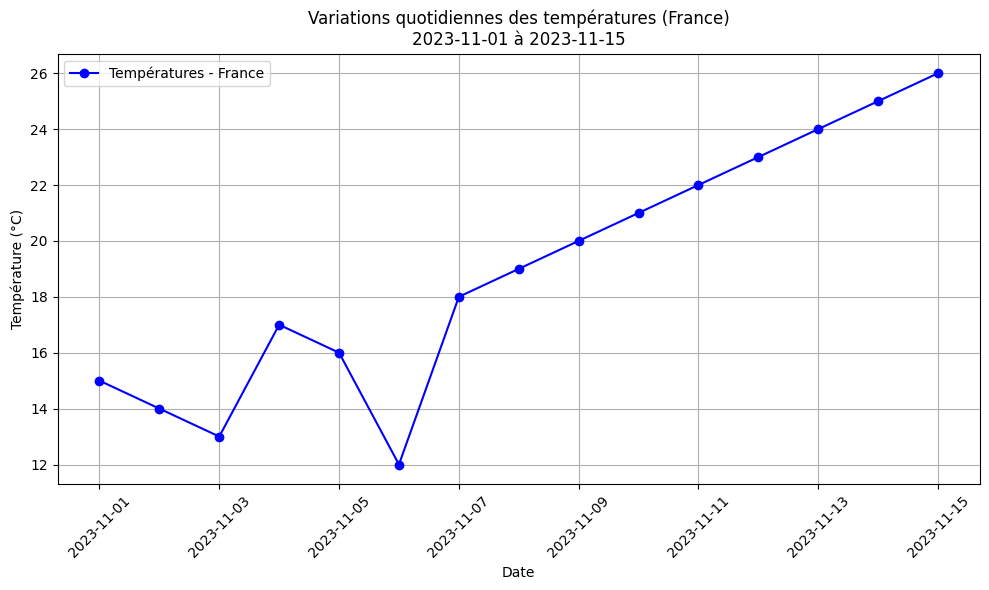

In [ ]:
#################################    Exemple : Graphiques de variation quotidienne    #################################

# Exemple de données fictives
example_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-11-01', periods=15, freq='D'),
    'Country': ['France'] * 15,
    'Temperature (°C)': [15, 14, 13, 17, 16, 12, 18, 19, 20, 21, 22, 23, 24, 25, 26]
})

# Appel de la fonction pour tracer les variations quotidiennes
graphique_variation_quotidienne(example_data, 'France', '2023-11-01', '2023-11-15')

### 6.2 : Diagrammes en Barres des Précipitations Mensuelles

Cette visualisation montre les précipitations mensuelles pour un pays donné sous forme de diagrammes en barres.


In [ ]:
################################################################################################################
### 2/ Diagrammes en barres
################################################################################################################
# Création d'une fonction pour représenter les précipitations mensuelles sous forme de diagrammes en barres
def diagramme_precipitations_mensuelles(data, pays):
    """
    Représente les précipitations mensuelles pour un pays donné sous forme de diagramme en barres.

    Arguments:
    - data : DataFrame contenant les données climatiques.
    - pays : Nom du pays à analyser.
    """
    # Filtrer les données pour le pays et ajouter une colonne 'Mois'
    data_filtre = data[data['Country'] == pays]
    data_filtre['Mois'] = pd.to_datetime(data_filtre['Date']).dt.to_period('M')

    # Calculer les précipitations totales par mois
    precipitations_mensuelles = data_filtre.groupby('Mois')['Precipitation (mm)'].sum()

    # Tracer le diagramme en barres
    plt.figure(figsize=(10, 6))
    plt.bar(precipitations_mensuelles.index.astype(str), precipitations_mensuelles, color='lightgreen', edgecolor='black')
    plt.title(f"Précipitations mensuelles ({pays})")
    plt.xlabel('Mois')
    plt.ylabel('Précipitations (mm)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### **Exemple : Diagrammes en barres**

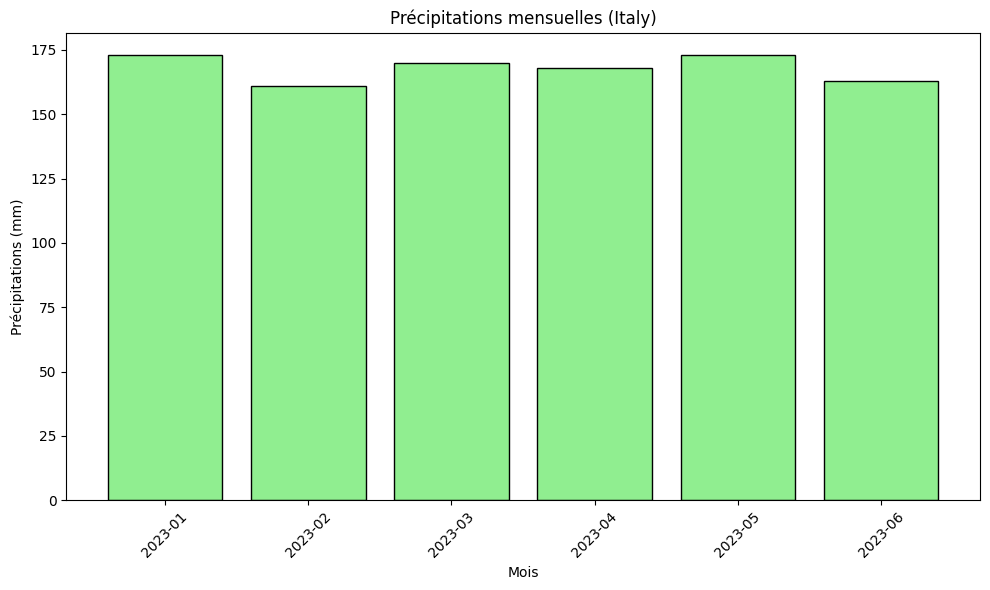

In [ ]:
#################################    Exemple : Diagrammes en barres    #################################

# Exemple de données fictives
example_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=180, freq='D'),
    'Country': ['Italy'] * 180,
    'Precipitation (mm)': [5, 8, 3, 0, 10, 15, 12, 0, 1, 2] * 18
})

# Appel de la fonction pour tracer les précipitations mensuelles
diagramme_precipitations_mensuelles(example_data, 'Italy')

### 6.3 : Anomalies Climatiques

Ce graphique met en évidence les anomalies climatiques (jours extrêmement chauds, froids ou secs) à l’aide de couleurs différentes.
- **Rouge** : Jours très chauds.
- **Bleu clair** : Jours très froids.
- **Orange** : Journées de sécheresse.


In [ ]:
################################################################################################################
### 3/ Anomalies climatiques
################################################################################################################
# Création d'une fonction pour mettre en évidence les anomalies climatiques (jours chauds, froids, secs)
def graphique_anomalies(data, pays, seuil_chaud, seuil_froid, seuil_sec):
    """
    Trace les variations quotidiennes des températures et précipitations avec mise en évidence des anomalies.

    Arguments:
    - data : DataFrame contenant les données climatiques.
    - pays : Nom du pays à analyser.
    - seuil_chaud : Température au-dessus de laquelle un jour est considéré comme très chaud.
    - seuil_froid : Température en dessous de laquelle un jour est considéré comme très froid.
    - seuil_sec : Précipitation en dessous de laquelle un jour est considéré comme sec.
    """
    # Filtrer les données pour le pays
    data_filtre = data[data['Country'] == pays]

    # Identifier les anomalies
    jours_chauds = data_filtre[data_filtre['Temperature (°C)'] > seuil_chaud]
    jours_froids = data_filtre[data_filtre['Temperature (°C)'] < seuil_froid]
    jours_secs = data_filtre[data_filtre['Precipitation (mm)'] < seuil_sec]

    # Tracer le graphique
    plt.figure(figsize=(12, 6))
    plt.plot(data_filtre['Date'], data_filtre['Temperature (°C)'], label='Températures', color='gray', alpha=0.7)
    plt.scatter(jours_chauds['Date'], jours_chauds['Temperature (°C)'], color='red', label='Jours très chauds')
    plt.scatter(jours_froids['Date'], jours_froids['Temperature (°C)'], color='blue', label='Jours très froids')
    plt.scatter(jours_secs['Date'], jours_secs['Temperature (°C)'], color='orange', label='Jours secs')

    plt.title(f"Anomalies climatiques ({pays})")
    plt.xlabel('Date')
    plt.ylabel('Température (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### **Exemple : Anomalies climatiques**

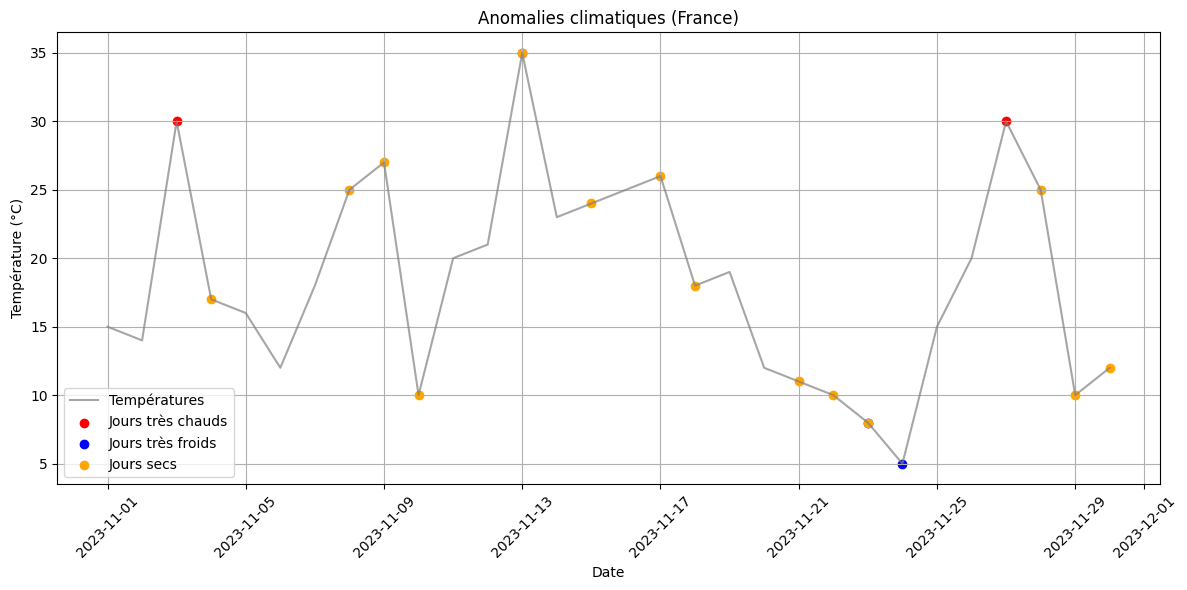

In [ ]:
#################################    Exemple : Anomalies climatiques    #################################

# Exemple de données fictives
example_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-11-01', periods=30, freq='D'),
    'Country': ['France'] * 30,
    'Temperature (°C)': [15, 14, 30, 17, 16, 12, 18, 25, 27, 10, 20, 21, 35, 23, 24, 25, 26, 18, 19, 12, 11, 10, 8, 5, 15, 20, 30, 25, 10, 12],
    'Precipitation (mm)': [5, 8, 3, 0, 10, 15, 12, 0, 1, 2, 8, 5, 0, 3, 2, 10, 1, 0, 4, 3, 2, 0, 1, 3, 5, 8, 3, 2, 1, 0]
})

# Appel de la fonction pour tracer les anomalies climatiques
graphique_anomalies(example_data, 'France', seuil_chaud=28, seuil_froid=10, seuil_sec=3)

## Partie 7 : Exemples Pratiques pour Chaque Fonctionnalité

### Exemple : Utilisation des Fonctions d'Analyse Climatique

In [ ]:
#################################    Exemple : Utilisation des Fonctions d'Analyse Climatique    #################################
# Générer des données pour les exemples
pays = ['France', 'Italy', 'India', 'Brazil', 'Australia']
dates = pd.date_range(start='2023-01-01', end='2023-12-31')
data = construire_dataset(pays, dates)

################################################################################################################
### 1/ Exemple pour la fonction detecter_anomalies_precipitations
################################################################################################################
print("\n    ######  Detecter_anomalies_precipitations  ######")
print("Cette fonction détecte les anomalies liées aux précipitations (sécheresse et fortes précipitations).")
# Définir les seuils pour détecter les anomalies
seuil_secheresse = 5  # Sécheresse si précipitations < 10 mm
seuil_forte_precipitation = 300  # Forte précipitation si précipitations > 150 mm

# Exemple : Détection des anomalies pour la France
print(" # Détection des anomalies climatiques pour la France.")
data_france = data[data['Country'] == 'France']
anomalies_france = detecter_anomalies_precipitations(data_france, seuil_secheresse, seuil_forte_precipitation)
print(f"Jours secs en France : {len(anomalies_france['secheresse'])}.")
print(f"Jours de fortes précipitations en France : {len(anomalies_france['fortes_precipitations'])}.")

################################################################################################################
### 2/ Exemple pour la fonction pays_plus_chauds_secs
################################################################################################################
print("\n    ######  Pays_plus_chauds_secs  ######")
print("Cette fonction identifie les trois pays les plus chauds et secs sur une période donnée.")

# Définir une période d'analyse
date_debut = '2023-06-01'
date_fin = '2023-08-31'

# Exemple 1 : Pays les plus chauds et secs pendant l'été
print(" # Analyse des pays les plus chauds et secs pendant l'été 2023.")
top_pays = pays_plus_chauds_secs(data, date_debut, date_fin)
print("Les 3 pays les plus chauds et secs sont : ")
print(top_pays)
################################################################################################################
### 3/ Exemple pour la fonction calcul_temperatures
################################################################################################################
print("\n    ######  Calcul_temperatures  ######  ")
print("Cette fonction calcule les températures moyennes, maximales et minimales pour une période donnée.")

# Exemple 1 : Calcul des températures global pendant l'été
print(" # Analyse des températures global (été 2023).")
temp_moy, temp_max, temp_min = calcul_temperatures(data, date_debut, date_fin)
print(f"Température moyenne : {temp_moy:.2f}°C.")
print(f"Température maximale : {temp_max:.2f}°C.")
print(f"Température minimale : {temp_min:.2f}°C.")

# Exemple 2 : Calcul des températures pour l'Inde pendant l'hiver
print("\n # Analyse des températures en Inde (hiver 2023).")
date_debut_hiver = '2023-01-01'
date_fin_hiver = '2023-03-31'
data_india = data[data['Country'] == 'India']
temp_moy_india, temp_max_india, temp_min_india = calcul_temperatures(data_india, date_debut_hiver, date_fin_hiver)
print(f"Température moyenne : {temp_moy_india:.2f}°C.")
print(f"Température maximale : {temp_max_india:.2f}°C.")
print(f"Température minimale : {temp_min_india:.2f}°C.")



    ######  Detecter_anomalies_precipitations  ######
Cette fonction détecte les anomalies liées aux précipitations (sécheresse et fortes précipitations).
 # Détection des anomalies climatiques pour la France.
Jours secs en France : 5.
Jours de fortes précipitations en France : 45.

    ######  Pays_plus_chauds_secs  ######
Cette fonction identifie les trois pays les plus chauds et secs sur une période donnée.
 # Analyse des pays les plus chauds et secs pendant l'été 2023.
Les 3 pays les plus chauds et secs sont : 
['Italy', 'Australia', 'India']

    ######  Calcul_temperatures  ######  
Cette fonction calcule les températures moyennes, maximales et minimales pour une période donnée.
 # Analyse des températures global (été 2023).
Température moyenne : 21.15°C.
Température maximale : 54.00°C.
Température minimale : -10.00°C.

 # Analyse des températures en Inde (hiver 2023).
Température moyenne : 22.86°C.
Température maximale : 54.00°C.
Température minimale : -10.00°C.


### Exemple : Visualisation des Données Complète

Données aléatoires générées entre (2020 et 2023) :
           Date    Country  Temperature (°C)  Precipitation (mm)  \
0    2020-01-01     France                44                 160   
1    2020-01-02     France                -5                 180   
2    2020-01-03     France                35                  75   
3    2020-01-04     France                30                 183   
4    2020-01-05     France                32                 109   
...         ...        ...               ...                 ...   
7300 2023-12-27  Australia                 0                 171   
7301 2023-12-28  Australia                41                  93   
7302 2023-12-29  Australia                 5                 146   
7303 2023-12-30  Australia                52                  25   
7304 2023-12-31  Australia                38                 101   

      Humidité (%)  Vitesse du vent (km/h)  
0               92                     140  
1               76                     134

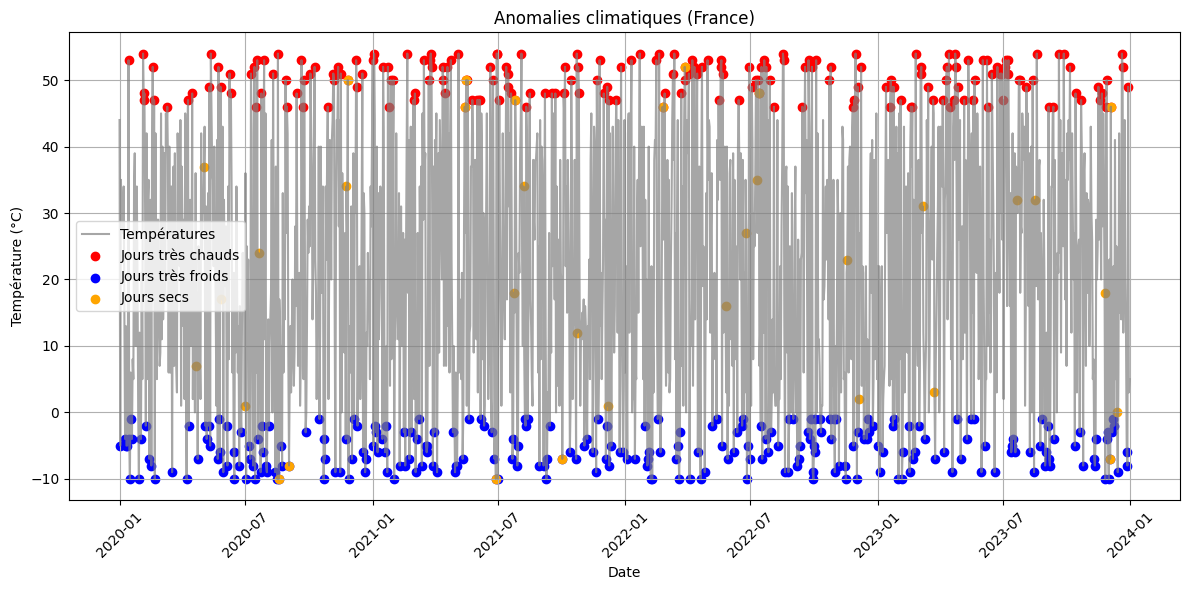


Visualisation des anomalies climatiques pour le Brezil durant l'été de l'année 2023


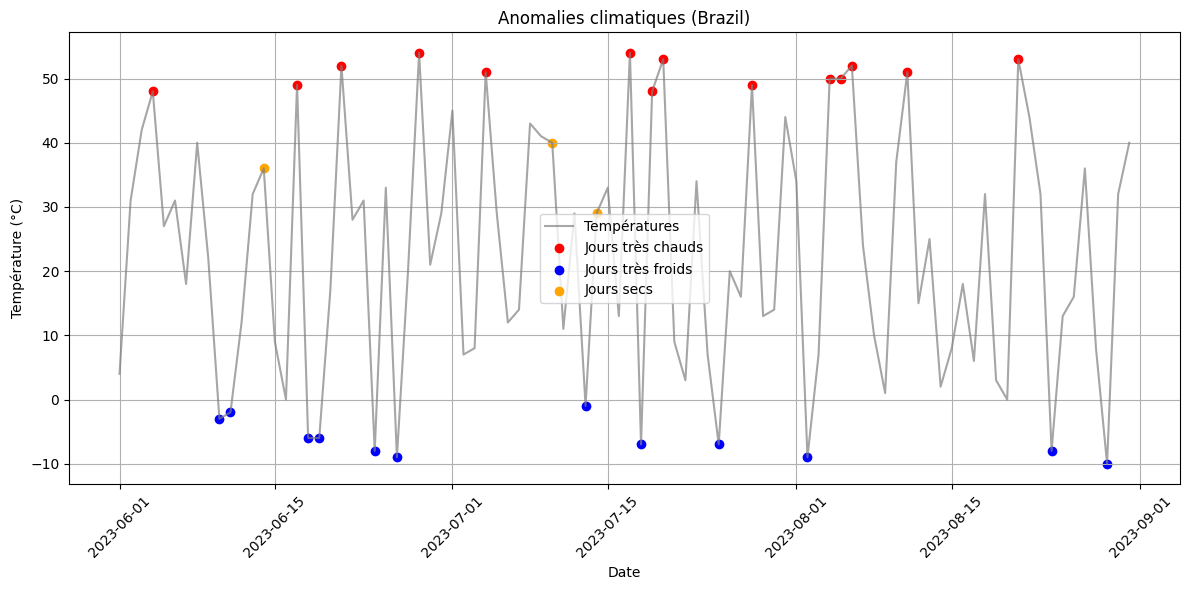


    ######  Diagramme_precipitations_mensuelles  ######
Cette fonction représente les précipitations mensuelles sous forme de diagrammes en barres pour un pays donné.
Visualisation des précipitations mensuelles pour l'Italie.


<ipython-input-119-258afee5a02b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtre['Mois'] = pd.to_datetime(data_filtre['Date']).dt.to_period('M')


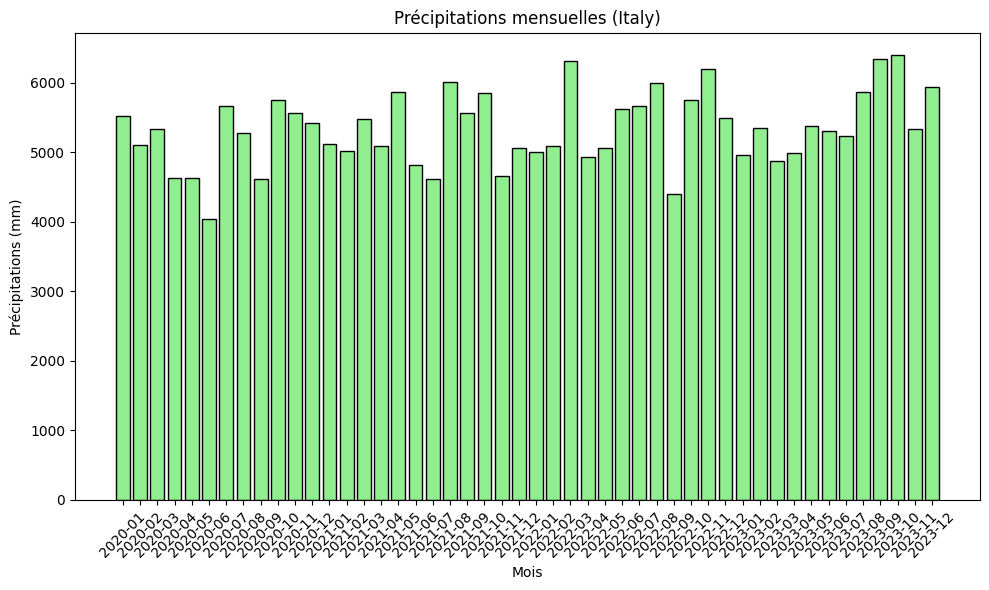


Visualisation des précipitations mensuelles pour le Brésil.


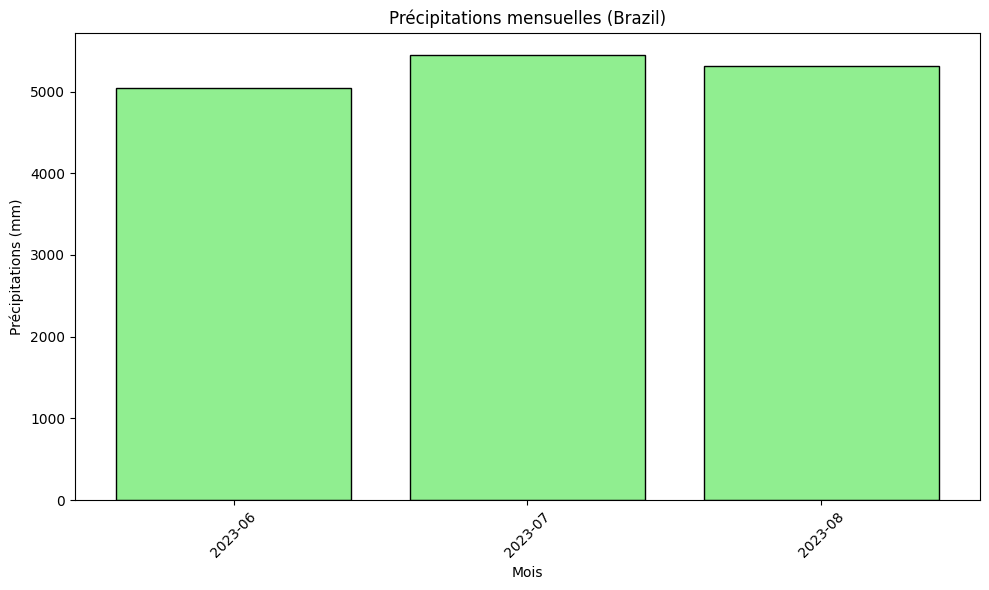


    ######  Graphique_variation_quotidienne  ######
Cette fonction trace les variations quotidiennes des températures pour un pays donné sur une période donnée.
Visualisation des variations quotidiennes des températures pour l'Inde (été 2023).


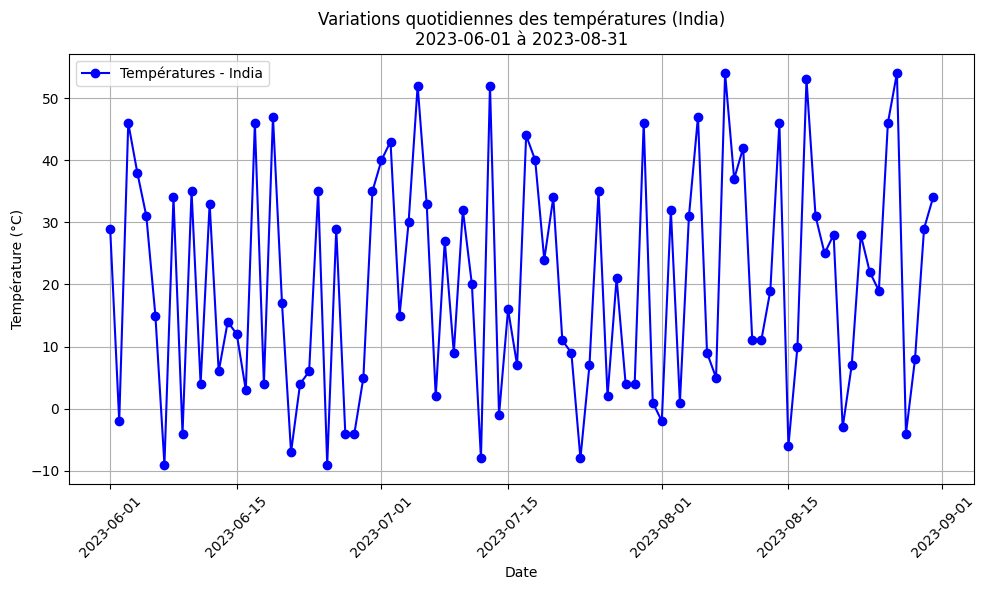


Visualisation des variations quotidiennes des températures pour l'Australie (hiver 2023).


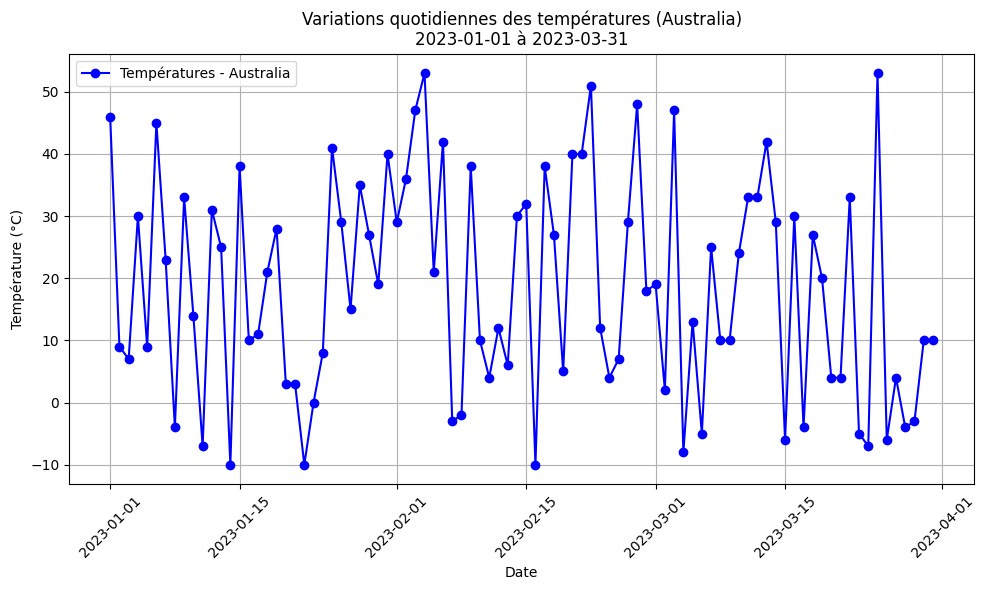

In [ ]:
#################################    Exemple : Analyse Climatique Complète    #################################
################################################################################################################
### 1/ Génération des données aléatoires
################################################################################################################
pays = ['France', 'Italy', 'India', 'Brazil', 'Australia']
dates = pd.date_range(start='2020-01-01', end='2023-12-31')
data = construire_dataset(pays, dates)

dates_ete = pd.date_range(start='2023-06-01', end='2023-08-31')
climat_brazil = creer_donnees_pays('Brazil', dates_ete)

################################################################################################################
### 2/ Affichage des données aléatoirement générées
################################################################################################################
print("Données aléatoires générées entre (2020 et 2023) :")
print(data)
print("\nDonnées pour le Brésil durant (l'été de l'année 2023) :")
print(climat_brazil)

################################################################################################################
### 3/ Visualiser les données aléatoirement générées
################################################################################################################
################################################################################
### a/ Exemple pour la fonction graphique_anomalies
print("\n    ######  Graphique_anomalies  ######")
print("Cette fonction trace les anomalies climatiques (jours très chauds, très froids, et secs) pour un pays donné.")

# Définir les seuils pour les anomalies
seuil_chaud = 45  # Température > 45°C : très chaud
seuil_froid = 0   # Température < 0°C : très froid
seuil_sec = 10    # Précipitations < 10 mm : jour sec

# Exemple 1 : Anomalies pour la France
print("Visualisation des anomalies climatiques pour la France pour la période de 3 entre (2020 et 2023).")
graphique_anomalies(data, 'France', seuil_chaud, seuil_froid, seuil_sec)

# Exemple 2 : Anomalies pour l'Brézil
print("\nVisualisation des anomalies climatiques pour le Brezil durant l'été de l'année 2023")
graphique_anomalies(climat_brazil, 'Brazil', seuil_chaud, seuil_froid, seuil_sec)

################################################################################
### 2/ Exemple pour la fonction diagramme_precipitations_mensuelles
print("\n    ######  Diagramme_precipitations_mensuelles  ######")
print("Cette fonction représente les précipitations mensuelles sous forme de diagrammes en barres pour un pays donné.")

# Exemple 1 : Précipitations mensuelles pour l'Italie
print("Visualisation des précipitations mensuelles pour l'Italie.")
diagramme_precipitations_mensuelles(data, 'Italy')

# Exemple 2 : Précipitations mensuelles pour le Brésil
print("\nVisualisation des précipitations mensuelles pour le Brésil.")
diagramme_precipitations_mensuelles(climat_brazil, 'Brazil')

################################################################################
### 3/ Exemple pour la fonction graphique_variation_quotidienne
print("\n    ######  Graphique_variation_quotidienne  ######")
print("Cette fonction trace les variations quotidiennes des températures pour un pays donné sur une période donnée.")

# Exemple 1 : Variations quotidiennes pour l'Inde (été 2023)
date_debut_ete = '2023-06-01'
date_fin_ete = '2023-08-31'
print("Visualisation des variations quotidiennes des températures pour l'Inde (été 2023).")
graphique_variation_quotidienne(data, 'India', date_debut_ete, date_fin_ete)

# Exemple 2 : Variations quotidiennes pour l'Australie (hiver 2023)
date_debut_hiver = '2023-01-01'
date_fin_hiver = '2023-03-31'
print("\nVisualisation des variations quotidiennes des températures pour l'Australie (hiver 2023).")
graphique_variation_quotidienne(data, 'Australia', date_debut_hiver, date_fin_hiver)





# ✅ Conclusion

À travers ce projet, nous avons pu appliquer des concepts importants dans l’analyse des données climatiques, en simulant des scénarios réalistes pour mieux comprendre les variations et anomalies météorologiques.

Chaque étape, depuis la génération des données jusqu’à leur analyse et visualisation, nous a permis de renforcer nos compétences en programmation Python, en particulier avec des bibliothèques telles que **Pandas**, **NumPy** et **Matplotlib**.

En outre, ce travail met en évidence les nombreux cas d’utilisation possibles de ces outils dans des projets concrets. L’intégration de données réelles et l’ajout de nouvelles analyses pourraient représenter une évolution intéressante pour approfondir cette étude.

Merci pour l’occasion de mener à bien ce projet !
